In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

### Q1)
 

In [2]:
Delivery = pd.read_csv("C:/Users/SHIVAM/OneDrive/Desktop/Data science Assignment/Linear Regression/delivery_time.csv")

In [19]:
Delivery

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


### EDA

In [4]:
Delivery.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [20]:
del_log= np.log(Delivery)

C:\Users\SHIVAM\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

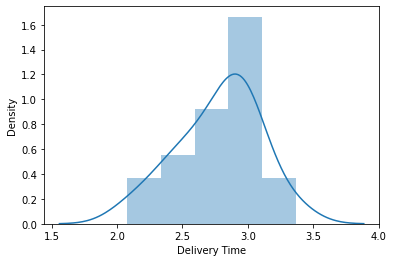

In [25]:
sns.distplot(del_log['Delivery Time'])

C:\Users\SHIVAM\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

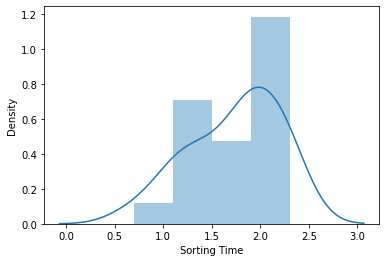

In [34]:
sns.distplot(del_log['Sorting Time'])

In [7]:
delivery = Delivery.rename(columns={"Delivery Time":"dt","Sorting Time":"st"})

In [8]:
delivery.head()

,dt,st
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


### Correlation

In [9]:
Delivery.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


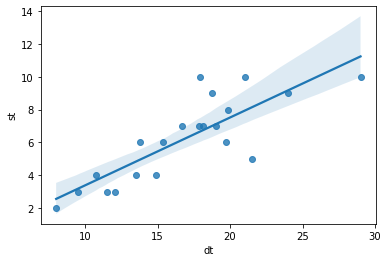

In [10]:
sns.regplot(x="dt", y="st", data=delivery);

## Model

In [11]:
import statsmodels.formula.api as smf 
model = smf.ols('dt~st',data=delivery).fit()

In [12]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     dt   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Thu, 27 Apr 2023   Prob (F-statistic):           3.98e-06
Time:                        18:59:15   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
st             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

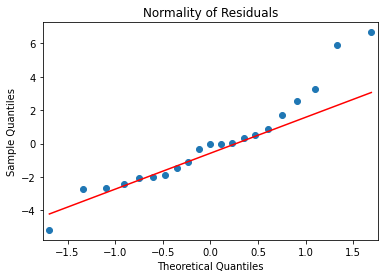

In [13]:
import statsmodels.api as sm
qqplot = sm.qqplot(model.resid,line='q')
plt.title('Normality of Residuals')
plt.show()

In [14]:
print(model.tvalues, '\n', model.pvalues)

Intercept    3.823349
st           6.387447
dtype: float64 
 Intercept    0.001147
st           0.000004
dtype: float64


In [15]:
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

rsquared value is 68% , t value is greater than p value and p value is less than α. So this means the model is good.

## Prediction using the Model

In [16]:
df = pd.Series([15,4,7,9,5])
df

0    15
1     4
2     7
3     9
4     5
dtype: int64

In [17]:
df_pred = pd.DataFrame(df,columns=['st'])

In [18]:
model.predict(df_pred)

0    31.318032
1    13.178814
2    18.125873
3    21.423913
4    14.827833
dtype: float64